# Decision Tree

``` 
Perform both classification and Regression task. Even multioutput regression task. 
Can handle very complex dataset 
Decision Trees are fundamental blocks for Random Forest. 

One good quality about decision tree is: 
it creates needs very less data preparation. Feature scaling is not required at all.

#### 1. Training and Visualizing Decision Tree

In [20]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier

# load iris dataset 
iris = load_iris()

# get the petal length and width 
X = iris.data[:, 2:]
y = iris.target

# create tree classifier 
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [21]:
# visualize the decision tree 
from sklearn.tree import export_graphviz

# create visualization 
export_graphviz(
    tree_clf, 
    out_file='OUTPUT/Chapter6/iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True, 
    filled=True
)

``` 
After file with extension ".dot" is created. Issue following command on terminal 
$ dot -Tpng iris_tree.dot -o iris_tree.png

This command will create png file output which looks like 
``` 

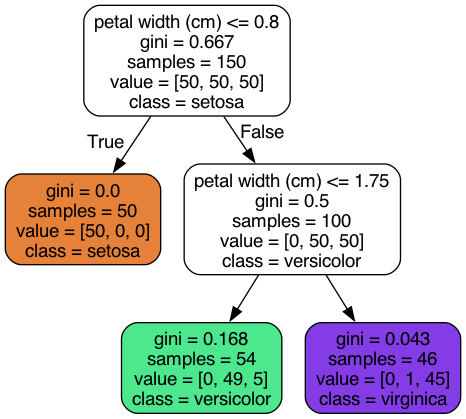

In [22]:
from PIL import Image

# open image
image_data = Image.open('OUTPUT/Chapter6/iris_tree.png').convert("RGB")
image_data

```
- Decision Trees starts with 150 samples at Depth 0 (root node). 
- Root node evaluates if petal width <= 0.8 cm then it is classifying iris flower instances as Sentosa. 
- The number of samples classified as Setosa = 50 at Depth 1 
- 100 samples remains unclassified at Depth 1 which is then checked if petal width is less than 1.75 cm 
- If so 54 samples are classified as versicolor and remaining as virginica 

Here node smaple attributes tells the numbers of instances used for training. 
node attribute gini measures impurity. Gini = 0 implies pure 
``` 

Gini Computation <br>
$G_i = 1 - \sum_{k=1}^{n}P_{i}k^2$

PiK is the ration of class k instance among training instances at ith node.


``` 
Model Interpretation 
- Decision Trees are intutive and easy to interpret. This is the reason it is called as WHITE BOX MODEL. We can trace back why the decision is made and may replicate the decision making algorithim. 
- Random Forest and Neural Networks are BLACK BOX MODEL as it is impossible to know which node made the decision which impacted the final outcome. If a photo belongs to X; with neural network we will not know why model predicted it X is it because of nose, eye or anything else. 
```

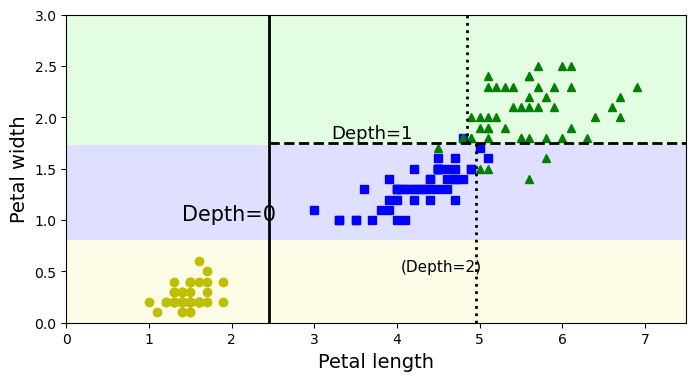

In [23]:
from matplotlib.colors import ListedColormap
import numpy as np 
import matplotlib.pyplot as plt 

# create decision tree boundaries 
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):

    # get 100 evenly spaced points between 0, 7.5 and 0, 3
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)

    # generate meshgrid 
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # make prediction on this dataset using the classifier passed 
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # create custom color map
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    # create countour for petal length and width against predictions made. 
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    # if iris indicator is false then use dirrent color map 
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    # plot training insrances as circle, square and triangle for setosa, versicolor and virginica respectively. 
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)

    # if this is iris dataset then set the x and y label 
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)

    # otherwise label them as x1 and x2
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    # get legend 
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# create plot 
plt.figure(figsize=(8, 4))

# call the function for given tree classifier 
plot_decision_boundary(tree_clf, X, y)

# create boundary lines 
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### Predicting probabilities
``` 
Decision tree classifier can be used for predicting the probablity as well. Consider we have a flower of length=5cm and width=1.5cm. Then decision tree will traverse through all the nodes and find the required search at depth=2. So probablity prediction will be 0% setosa, 91% versicolor and 9% virginica 

In [25]:
flower=[[5,1.5]]
tree_clf.predict_proba(flower)

array([[0.        , 0.90740741, 0.09259259]])

In [26]:
# when predicting which flower is it 
tree_clf.predict(flower)

array([1])

In [27]:
# now say petal length is 6 cm 
flower=[[6,1.5]]
tree_clf.predict_proba(flower)

array([[0.        , 0.90740741, 0.09259259]])

``` 
Notice the output remains consistent. Even though flower is likely to be Viginica here!!!! 

### Model Interpretation 
- Decision trees are intutive and easy to interpret. 
- Such models are called WHITE BOX MODELS 
- Random Forest or Neural network are called BLACK BOX MODELS. 
<br><br>
This is because with white box we know how and where is the decision made. However, in black box model we dont know how model made the decision. For instance photo of person - with black box we will not know how model identified the person X because of his eyes, nose or something else

# 2. CART Algo
CART stands for Classification & Regression Tree - scikit uses this for Decision Tree
Algo works by first splitting the training set into two subsets - Single Feature (k) and Threshold $t_k$. 
Cost Function cne be given as: <br>
$J(K, t_k) = m_{left} G_{left}/m + m_{right} G_{right}/m$ <br>
$G_{left} \space or \space G_{right}$ - measure of impurity of left/right subset <br>
$m_{left} \space or \space m_{right}$ - Number of instances in left/right subset <br>
<br><br>
Once CART algo has successfully split the training set into 2, it splits the subset using same logic and keep doing recusively. It stops once max_depth defined is reached or if it is unable to find the splot that will reduce the impurity. 
<br>
CART algo is greedy by nature. it greedilu searches for optimum split at top level and repeats at each subsequent level. It does not check wheteher or not split will lead to lowest possible impurity. This is the reason it can produce good solution but not optimal. 



# 3. Regularization Hyperparameters 
- Decision tree makes very few assumptions about training data in contrast to linear model which assumes data to be linear. 
- If left unconstrained, Decision tree will adapt to data. And will fit very closely causing overfitting. 
- These types of models are called Non-parameteric models, because the number of parameters is not determined prior to training. Thus model is free to stick closely to data. 
- However, Linear model is parameteric and degree of freedom is limited; reducing risk of overfitting. 
- Restrict Decision tree freedom during training itself. 
- Regularize hyperparameters: 
```
    a. max_depth - Number of depths of given sample 
    b. min_sample_split - Min number of samples a node must have before the split. 
    c. min_sample_leaf - min number of leaf a sample must have 
    d. min_weight_fraction_leaf = same as min_samples; just has fraction of total number of instances 
    e. max_leaf_nodes - max number of leaf nodes 
    f. max_features - max number of features that are evaluated for splitting at each node.
```
<br><br>
Reducing max_* and increasing min_* hyperparameters will regularize the model.


In [ ]:
# tweak random state and checkout the decision boundary - it will change
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

In [35]:
# visualize the decision tree 
from sklearn.tree import export_graphviz

# create visualization 
export_graphviz(
    tree_clf_tweaked, 
    out_file='OUTPUT/Chapter6/iris_tree_tweaked.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True, 
    filled=True
)

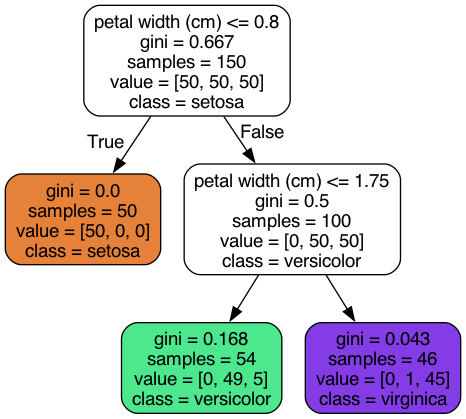

In [36]:
Image.open('OUTPUT/Chapter6/iris_tree_tweaked.png').convert("RGB")

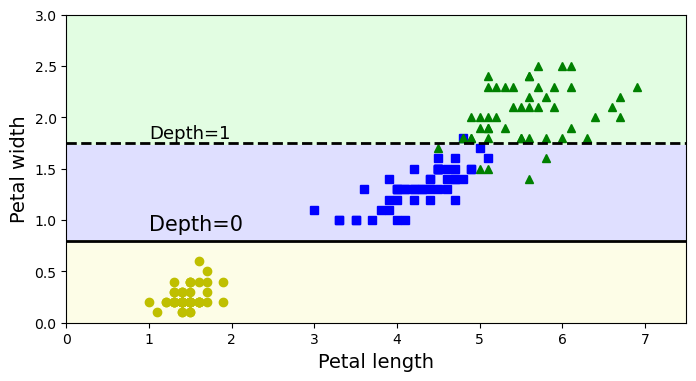

In [ ]:
# plot the decision boundary
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.show()

In [34]:
flower

[[6, 1.5]]

In [33]:
tree_clf_tweaked.predict(flower)

array([1])

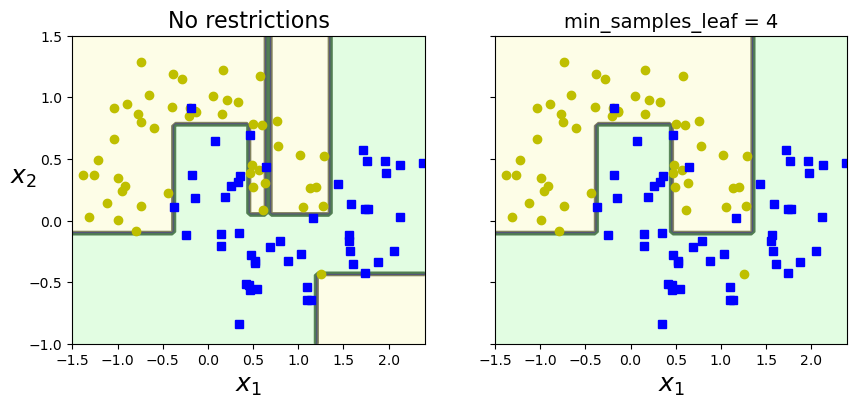

In [30]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

In [37]:
# visualize the decision tree 
from sklearn.tree import export_graphviz

# create visualization 
export_graphviz(
    deep_tree_clf1, 
    out_file='OUTPUT/Chapter6/iris_deep_tree_clf1.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True, 
    filled=True
)

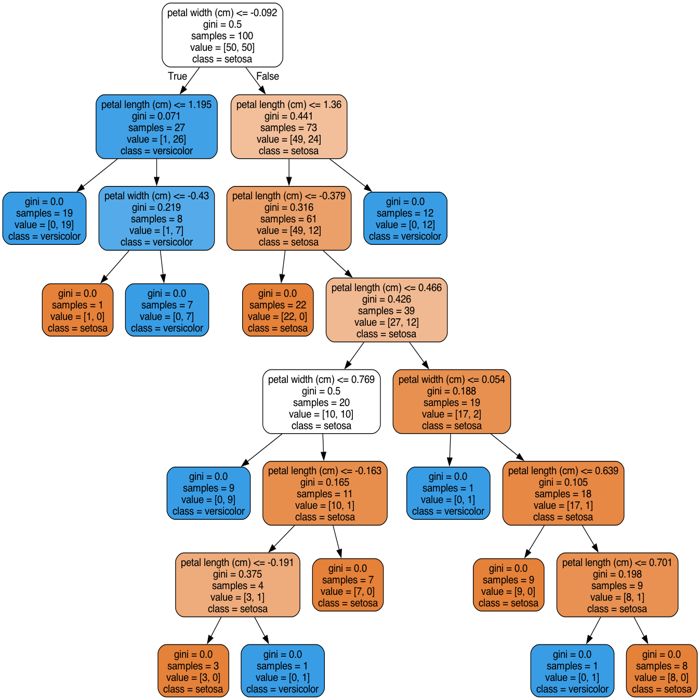

In [48]:
Image.open('OUTPUT/Chapter6/iris_deep_tree_clf1.png').resize((700,700))

In [38]:
# visualize the decision tree 
from sklearn.tree import export_graphviz

# create visualization 
export_graphviz(
    deep_tree_clf2, 
    out_file='OUTPUT/Chapter6/iris_deep_tree_clf2.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True, 
    filled=True
)

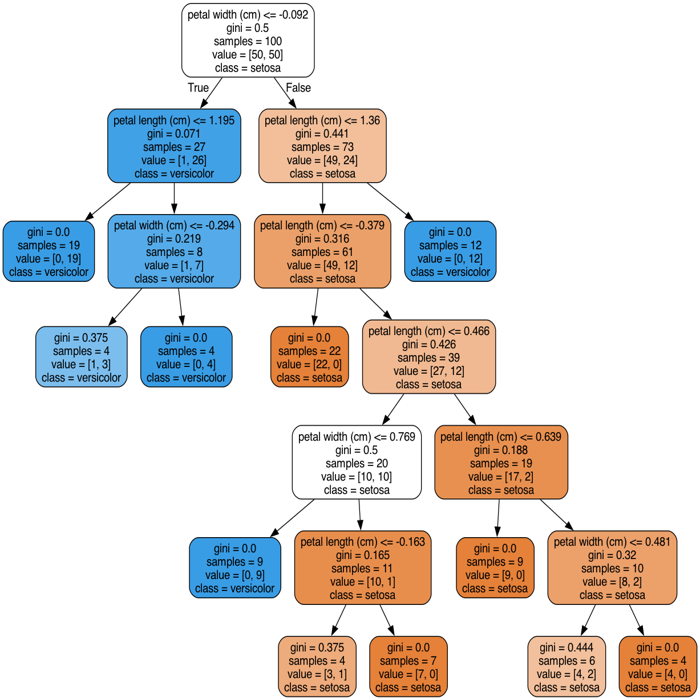

In [49]:
Image.open('OUTPUT/Chapter6/iris_deep_tree_clf2.png').resize((700, 700))

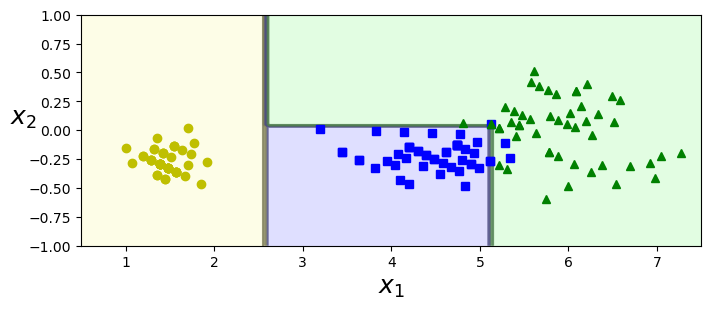

In [31]:
# rotating the dataset will also lead completely different decision boundary 
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Text(0, 0.5, '')

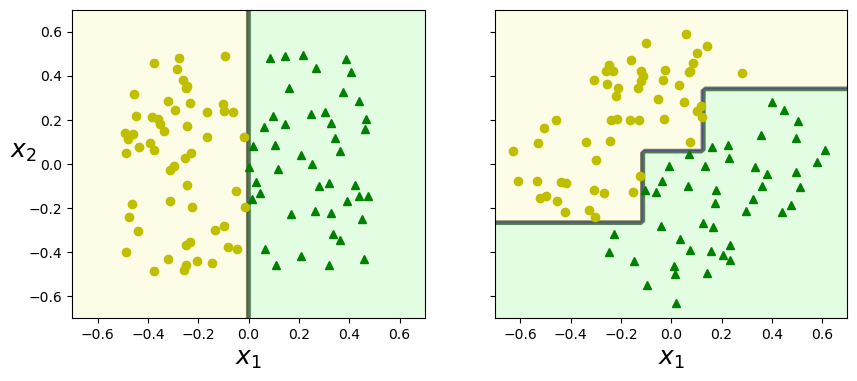

In [32]:
# Senstivity to rotation of training set 
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

# 4. Regression
- Similar to classification, here instead of minimizing impurity (classification does), we minimize the MSE

In [50]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [51]:
from sklearn.tree import DecisionTreeRegressor

# create tree regressor model
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [53]:
export_graphviz(
    tree_reg,
    out_file="OUTPUT/Chapter6/regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

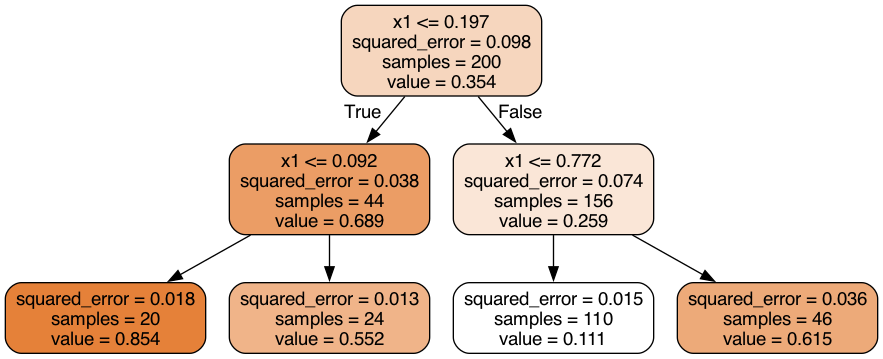

In [57]:
Image.open('OUTPUT/Chapter6/regression_tree.png')

``` 
Predictions using 2 models with different depth
```

Text(0.5, 1.0, 'max_depth=3')

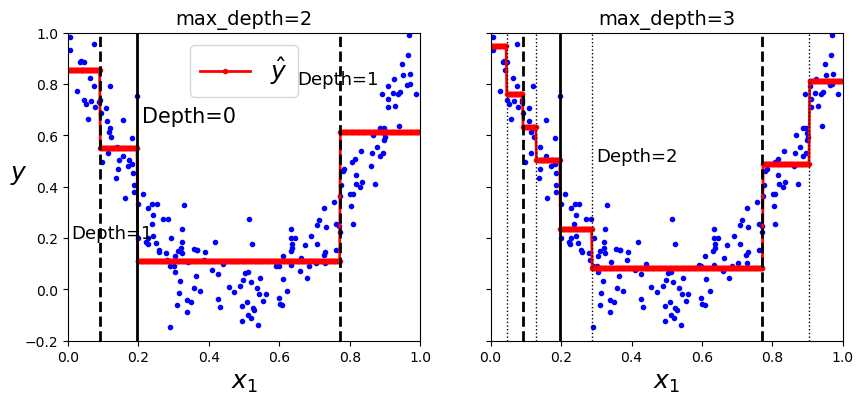

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

```
Regularization of Decision Tree 
```

Text(0.5, 1.0, 'min_samples_leaf=10')

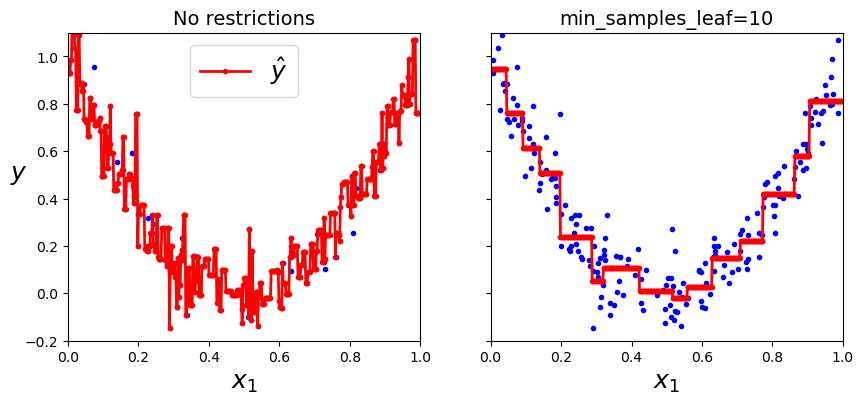

In [59]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

``` 
Q1. Approx depth of decision tree trained without restriction on training set with one million instances 
Ans: If no depth set; and all data in the trianing set is different - decision tree will try to overfit. Considering the decision tree creates binary tree cotaining m leaves; depth will be log m
so, log (10^6) ~ 20 

Q2. Gini impurity is lower or greater than its parent? 
Ans: Generally it is lower than parent as decision tree tries to minimize the cost function. However, there can be instances where gini impurity can be greater than its parent due greedy nature of CART algo

Q3. If decision tree is overfitting is it a good idea to decrease max_depth 
Ans: yes, all for overfitting case reducing max_* hyperparameters will help 

Q4. If decision tree is underfitting, is it good idea to scale input features? 
Ans: feature scaling has no impact on decision tree. 

Q5. If decision tree takes 1 hour to train 1 million instances. How much time it will take to train 10 million instances? 
Ans: Computational complexity of decision tree is O(m x m log (m)). It will take roughly 11 hours to train.

Q6. If training 100,000 instances, will setting presort=True speed up training? 
Ans: No. Presorting will help if instances are in hundereds or thousands. presorting 100,000 instaces will slow down the process. 

```
# Q7. Train and fine tune Decision Tree for moon dataset by following steps 

In [ ]:
# a. use make_moons(n_samples=10000, noise=0.4)
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [61]:
# b. split training and test set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# c. use grid search with cross validation to find good hyperparameter values for decision tree classifier 

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [63]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [64]:
# d. train the best estimator model and measure the performance 
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

```
# Q8. Grow a forest

In [65]:
# a. continuing with previous example, gtenerate 1000 subset of training set each containing 100 instances selected randomly
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [66]:
# b. train one decision tree on each subset using best estimator hyperparameters. Evaluate these 1000 trees pm test set 
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

np.float64(0.8054865)

In [67]:
# c. Now for each test set instance, generate prediction of 1000 decision trees and keep them only the most frequnt prediction. 
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [68]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [69]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872